## Hydropandas

Hydropandas is a Python package for reading, writing and analyzing hydrological time series. Just like any Python package you will have to install it the first time you use it.

In [24]:
# install the hydropandas package (you only have to do this once)
! pip install hydropandas

In [3]:
# import all the packages required for this notebook
# if you get an import error try installing this package using pip or conda

import hydropandas as hpd
import pandas as pd
import numpy as np
from bokeh.io import show

## Groundwater Observation

You can create a GroundwaterObs object using the Hydropandas package. To do this you define a measurement time series and the metadata of the observation well. See the example below.

In [17]:
hpd.GroundwaterObs?

Init signature: hpd.GroundwaterObs(*args, **kwargs)
Docstring:     
Class for groundwater quantity observations.

Subclass of the Obs class. Has the following attributes:

- monitoring_well: 2 tubes at one piezometer should have the same 'monitoring_well'
- tube_nr: 2 tubes at one piezometer should have a different 'tube_nr'.
- screen_top: top op the filter in m above date (NAP)
- screen_bottom: bottom of the filter in m above date (NAP)
- ground_level: surface level in m above date (NAP) (maaiveld in Dutch)
- tube_top: top of the tube in m above date (NAP)
- metadata_available: boolean indicating if metadata is available for
  the measurement point.
Init docstring:
*args must be input for the pandas.DataFrame constructor,
**kwargs can be one of the attributes listed in _metadata or
keyword arguments for the constructor of a pandas.DataFrame.
File:           c:\users\oebbe\02_python\hydropandas\hydropandas\observation.py
Type:           type
Subclasses:     


In [29]:
# Create a groundwater observation object from scratch
o = hpd.GroundwaterObs(index=pd.date_range('1-1-2023', '13-1-2023'), 
                      data=np.random.randint(0,10, size= (13,1)),
                      columns=['values'],
                      name='my observation', monitoring_well='w1',
                      screen_top=35.2, screen_bottom=32.2,
                      x=123456, y=654321, unit='MASL', tube_nr=1, 
                      metadata_available=True)
print(o)

GroundwaterObs my observation
-----metadata------
name : my observation 
x : 123456 
y : 654321 
filename :  
source :  
unit : MASL 
monitoring_well : w1 
tube_nr : 1 
screen_top : 35.2 
screen_bottom : 32.2 
ground_level : nan 
tube_top : nan 
metadata_available : True 

-----time series------
            values
2023-01-01       5
2023-01-02       1
2023-01-03       6
2023-01-04       4
2023-01-05       6
2023-01-06       6
2023-01-07       3
2023-01-08       3
2023-01-09       8
2023-01-10       3
2023-01-11       5
2023-01-12       9
2023-01-13       6


For some Dutch hydrological databases we can use the API to automatically download the data using the ID. The example below shows how to obtain the measurement data using an ID from the BRO database.

In [5]:
# obtain a groundwater observation from the BRO (Dutch) database
o = hpd.GroundwaterObs.from_bro('GLD000000012893')
print(o)

GroundwaterObs GMW000000036287_1
-----metadata------
name : GMW000000036287_1 
x : 118300.381 
y : 439767.501 
filename :  
source : BRO 
unit : m NAP 
monitoring_well : GMW000000036287 
tube_nr : 1 
screen_top : 0.142 
screen_bottom : -0.858 
ground_level : 1.932 
tube_top : 1.802 
metadata_available : True 

-----time series------
                     values    qualifier
2020-09-14 01:00:00   0.790  goedgekeurd
2020-09-14 02:00:00   0.790  goedgekeurd
2020-09-14 03:00:00   0.788  goedgekeurd
2020-09-14 04:00:03   0.787  goedgekeurd
2020-09-14 05:00:03   0.792  goedgekeurd
...                     ...          ...
2023-03-18 14:30:12   0.890  goedgekeurd
2023-03-18 20:30:25   0.897  goedgekeurd
2023-03-18 21:30:25   0.900  goedgekeurd
2023-03-18 22:30:25   0.900  goedgekeurd
2023-03-19 20:30:30   0.903  goedgekeurd

[12490 rows x 2 columns]


`o` is now a GroundwaterObs object. A GroundwaterObs object has the same attributes and methods as a pandas DataFrame. We can use these methods to do some analysis.

In [6]:
# get some statistics of the observations
o['values'].describe()

count    12490.000000
mean         0.887986
std          0.052723
min         -0.820000
25%          0.857000
50%          0.887000
75%          0.921000
max          1.064000
Name: GMW000000036287_1, dtype: float64

Additionally a GroundwaterObs object has some extra attributes:
- "name"
- "x"
- "y"
- "source"
- "unit"
- "monitoring_well"
- "tube_nr"
- "screen_top"
- "screen_bottom"
- "ground_level"
- "tube_top"

We can use these attributes, for example when plotting the data. Below we use the "unit" and "name" attribute when plotting the time series.

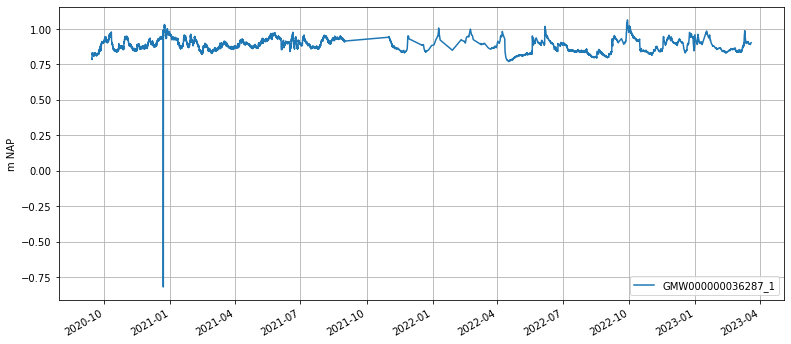

In [11]:
# plot the data
o['values'].plot(ylabel=o.unit, label=o.name, 
                 legend=True, figsize=(13,6), grid=True);

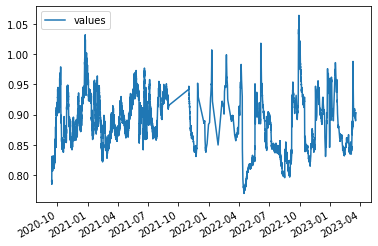

In [23]:
# filter data based on the qualifier, 'goedgekeurd' means 'approved'.
o_selection = o.loc[o['qualifier']=='goedgekeurd']
# plot filtered data
o_selection.plot();

## ObsCollection

In a project you usualy you have multiple wells with measurements. In Hydropandas we can store a number of GroundwaterObs object in an ObsCollection object. We demonstrate this using the code below.

In [17]:
# create one GroundwaterObs object
o1 = hpd.GroundwaterObs(index=pd.date_range('1-1-2023', '13-1-2023'), 
                        data=np.random.randint(0,10, size= (13,1)),
                         columns=['values'],
                        name='my observation 1', monitoring_well='w1',
                        screen_top=35.2, screen_bottom=32.2,
                        x=123456, y=654321, unit='MASL', tube_nr=1, 
                        metadata_available=True)

# create another GroundwaterObs object
o2 = hpd.GroundwaterObs(index=pd.date_range('2021-5-1', '2021-5-13'), 
                        data=np.random.randint(15,30, size= (13,1)),
                         columns=['values'],
                         name='my observation 2', monitoring_well='w2',
                        screen_top=6.7, screen_bottom=2.7,
                        x=123465, y=654312, unit='MASL', tube_nr=1, 
                        metadata_available=True)

# store both GroundwaterObs object in an ObsCollection
oc = hpd.ObsCollection(o1,o2)
oc

,x,y,filename,source,unit,monitoring_well,tube_nr,screen_top,screen_bottom,ground_level,tube_top,metadata_available,obs
name,,,,,,,,,,,,,
my observation 1,123456,654321,,,MASL,w1,1,35.2,32.2,NaN,NaN,True,GroundwaterObs my observation 1 -----metadata-...
my observation 2,123465,654312,,,MASL,w2,1,6.7,2.7,NaN,NaN,True,GroundwaterObs my observation 2 -----metadata-...


Just as with the GroundwaterObs object for some Dutch databases we can use the API to automatically download an ObsCollection. The example below shows how to obtain multiple observations within a certain extent from the BRO database.

In [21]:
oc = hpd.read_bro(extent=(117850, 118180, 439550, 439900), keep_all_obs=False)
oc

100%|██████████| 4/4 [00:09<00:00,  2.32s/it]


,x,y,filename,source,unit,monitoring_well,tube_nr,screen_top,screen_bottom,ground_level,tube_top,metadata_available,obs
name,,,,,,,,,,,,,
GMW000000036319_1,117957.010,439698.236,,BRO,m NAP,GMW000000036319,1,-1.721,-2.721,-0.501,-0.621,True,GroundwaterObs GMW000000036319_1 -----metadata...
GMW000000036327_1,118064.196,439799.968,,BRO,m NAP,GMW000000036327,1,-0.833,-1.833,0.856,0.716,True,GroundwaterObs GMW000000036327_1 -----metadata...
GMW000000036365_1,118127.470,439683.136,,BRO,m NAP,GMW000000036365,1,-0.429,-1.428,1.371,1.221,True,GroundwaterObs GMW000000036365_1 -----metadata...


You can see that all the additional attributes of a GroundwaterObs object are used as columns in the ObsCollection. The last 'obs' column contains the GroundwaterObs object itself. We can get this groundwater obs object using the usual pandas methods of indexing, slicing and subselecting. See two examples below.

In [26]:
# get the groundwater observation with name 'GMW000000036327_1'
o = oc.loc['GMW000000036327_1','obs']
print(o)

GroundwaterObs GMW000000036327_1
-----metadata------
name : GMW000000036327_1 
x : 118064.196 
y : 439799.968 
filename :  
source : BRO 
unit : m NAP 
monitoring_well : GMW000000036327 
tube_nr : 1 
screen_top : -0.833 
screen_bottom : -1.833 
ground_level : 0.856 
tube_top : 0.716 
metadata_available : True 

-----time series------
                     values    qualifier
2020-09-14 01:00:12   0.042  goedgekeurd
2020-09-14 02:00:12   0.040  goedgekeurd
2020-09-14 03:00:12   0.041  goedgekeurd
2020-09-14 04:00:12   0.044  goedgekeurd
2020-09-14 05:00:12   0.044  goedgekeurd
...                     ...          ...
2023-03-14 22:05:17   0.149  goedgekeurd
2023-03-15 00:05:17   0.145  goedgekeurd
2023-03-15 03:05:18   0.153  goedgekeurd
2023-03-15 04:05:19   0.154  goedgekeurd
2023-03-15 16:05:20   0.143  goedgekeurd

[16996 rows x 2 columns]


In [28]:
# get all the groundwater observations with a screen bottom below NAP -1.5 m
oc.loc[oc['screen_bottom'] < -1.5]

,x,y,filename,source,unit,monitoring_well,tube_nr,screen_top,screen_bottom,ground_level,tube_top,metadata_available,obs,lat,lon
name,,,,,,,,,,,,,,,
GMW000000036319_1,117957.010,439698.236,,BRO,m NAP,GMW000000036319,1,-1.721,-2.721,-0.501,-0.621,True,GroundwaterObs GMW000000036319_1 -----metadata...,51.944501,4.848447
GMW000000036327_1,118064.196,439799.968,,BRO,m NAP,GMW000000036327,1,-0.833,-1.833,0.856,0.716,True,GroundwaterObs GMW000000036327_1 -----metadata...,51.945422,4.849995


Just like a GroundwaterObs obejct an ObsCollection object has the same attributes and methods as a pandas DataFrame. Additionally an ObsCollection object has methods stored in submodules:
`geo`:
- `get_bounding_box` -> get a tuple with (xmin, ymin, xmax, ymax)
- `get_extent` -> get a tule with (xmin, xmax, ymin, ymax)
- `get_lat_lon` -> to get the lattitudes and longitudes from the x and y coordinates
- `within_polygon` -> to select only the observations that lie within a polygon

`gwobs`:
- `set_tube_nr` -> to set the tube numbers based on the tube screen depth when there are multiple tubes at one monitoring well
- `set_tube_nr_monitoring_well` -> find out which observations are at the same location with a different screen depth. Set monitoring_well and tube_nr attributes accordingly.

`plots`:
- `interactive_figures` -> create bokeh figures for each observation point.
- `interactive_map` -> create a folium map with observation points and bokeh figures for each observation point.
- `section_plot` -> create a plot of multiple observations and a plot of the well layout.

`stats`:
- `get_first_last_obs_date()` -> get the first and the last date of the observations for each observation point
- `get_no_of_observations()` -> get the number of observations
- `get_seasonal_stat()` -> get seasonal stats of the observations

In the example below we use the `set_lat_lon` method in the `geo` module to get the lattitude and longitude for our observations. Then we use the `interactive_map` method of the `plots` module to create an interactive map with graphs for each observation.

In [29]:
oc.geo.set_lat_lon() # get lattitude and lognitude for each observation
oc.plots.interactive_map(plot_dir="figure") # create an interactive map

More information on Hydropandas can be found in the official [documentation](#https://hydropandas.readthedocs.io/en/stable/).